# **Welcome to another section on NLP Chatbot**

**Chatbots** are simulations which can be **understand human language**, process it and interact back with humans while performing specific tasks

# **Types of chatbots**

1.   Text-based chatbots
2.   voice-based chatbots

**Chatbots are designed using these approaches:**
*   **Rule-based Chatbot**: Bot answers question based on some rule on it is trained on. The rules defined can be very simple to very complex 
*   **Self-learning Chatbot**: Bot that learns how to communicate using result of machine learning model to learn and assess current situations.





# **Application of Chatbots**

*   Helpdesk assistant
*   Email distributor 
*   Home assistant
*   Operations assistant
*   Phone assistant
*   Entertainment assistant



# **Architecture of Chatbots**

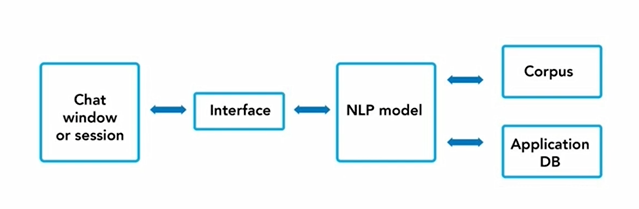

# **How does a chatbot work?**

1.   **Import corpus** - is the training data needed for the chatbot to learn
2.   **Preprocess the data** - Convert all the data coming as an input to either upper or lowercase. This will avoid misrepresentation and misinterpretation of words if splt under lower or upper cases.
3.   **Text case handling** - it's the process of preprocessing data. 
4.   **Tokenization** - Convert a sentence into individual collection of words.
5.   **Stemming** - is a process of finding similarities between words with the same root words
6.   **Bag of Words (BOG)** - process of converting words into numbers by generating vector embeddings from the tokens generated.
7.   **One hot encoding** - is a process by which categorical variables are converted into a form that ML algorithms use

# **Importing the requried libraries**

In [ ]:
import numpy as np
import nltk
import string
import random

# **Importing and reading the corpus**

In [ ]:
f = open('chatbot.txt', 'r', errors = 'ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower() # converts text to lowercase
nltk.download('punkt') # using the Punkt tokenizer
nltk.download('wordnet') # using the wordnet dictionary
sent_tokens = nltk.sent_tokenize(raw_doc) # convert doc to list of sentences
word_tokens = nltk.word_tokenize(raw_doc) # convert doc to list of word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **Example of sentence tokens**

In [ ]:
sent_tokens[:2]

['debo engineering is an integrated engineering discipline organization based on recently emerging technologies such as artificial intelligence, ml, iot, image processing, big data analysis, mobile computing, and any field related to engineering.',
 'we design, analyze, develop, and implement smart business applications solution for any problems those need digital solution for agriculture, transportation, health, education, and other sectors.']

# **Example of word tokens**

In [ ]:
word_tokens[:2]

['debo', 'engineering']

# **Text preprocessing**

In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
# WordNet is a semantically-oriented dictionary of English included NLTK
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# **Defining the greeting function**

In [ ]:
GREET_INPUTS = ('hello', 'hi', 'greetings', 'sup', "what's up", 'hey')
GREET_RESPONSES = ['hi', 'hey', '*nods*', 'hi there', 'hello', 'I am glad! You are talking me']
def greet(sentence):
  for word in sentence.split():
    if word.lower() in GREET_INPUTS:
      return random.choice(GREET_RESPONSES)

# **Response Generation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def response(user_response):
  robo1_response = ''
  TfidfVec = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english')
  tfidf = TfidfVec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1], tfidf)
  idx = vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if (req_tfidf == 0):
    robo1_response = robo1_response + "I am sorry! I don't understand you"
    return robo1_response
  else:
    robo1_response = robo1_response + sent_tokens[idx]
    return robo1_response 

# **Defining conversation start/end protocols**

In [ ]:
flag = True
print("BOT: My name is Debo. Let's have a conversation! Also, if you wnat to exit any time, just type Bye!")
while(flag == True):
  user_response = input()
  user_response = user_response.lower()
  if(user_response!='bye'):
    if(user_response == 'thanks' or user_response == 'thank you'):
      flag = False
      print('BOT: You are welcome')
    else:
      if(greet(user_response) != None):
        print("BOT: " + greet(user_response))
      else:
        sent_tokens.append(user_response)
        word_tokens = word_tokens + nltk.word_tokenize(user_response)
        final_words = list(set(word_tokens))
        print("Bot: ", end = "")
        print(response(user_response))
        sent_tokens.remove(user_response)
  else:
    flag = False
    print("BOT: Goodbye! Take care <3 ") 

BOT: My name is Debo. Let's have a conversation! Also, if you wnat to exit any time, just type Bye!
data mining
Bot: 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


data mining
machine learning


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


Bot: "what is machine learning?".
hi
BOT: hi there
overview


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


Bot: contents
1	overview
2	history and relationships to other fields
2.1	artificial intelligence
2.2	data mining
2.3	optimization
2.4	generalization
2.5	statistics
3	theory
4	approaches
4.1	supervised learning
4.2	unsupervised learning
4.3	semi-supervised learning
4.4	reinforcement learning
4.5	dimensionality reduction
4.6	other types
4.7	models
4.8	training models
5	applications
6	limitations
6.1	bias
6.2	overfitting
6.3	other limitations
7	model assessments
8	ethics
9	hardware
9.1	neuromorphic/physical neural networks
9.2	embedded machine learning
10	software
10.1	free and open-source software
10.2	proprietary software with free and open-source editions
10.3	proprietary software
11	journals
12	conferences
13	see also
14	references
15	sources
16	further reading
17	external links
overview
learning algorithms work on the basis that strategies, algorithms, and inferences that worked well in the past are likely to continue working well in the future.
theory


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


Bot: [28]

theory
main articles: computational learning theory and statistical learning theory
a core objective of a learner is to generalize from its experience.
Limitations


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


Bot: [9]

other limitations
learners can also disappoint by "learning the wrong lesson".
overfitting


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


Bot: it is a powerful tool we are only just beginning to understand, and that is a profound responsibility.”[105]

overfitting
main article: overfitting

the blue line could be an example of overfitting a linear function due to random noise.
thanks
BOT: You are welcome
